# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("../cleaned_data/train_clean.csv")
valid = pd.read_csv("../cleaned_data/validation_clean.csv")
test = pd.read_csv("../cleaned_data/test_clean.csv")

combined = pd.concat([valid, test], ignore_index=True)

In [3]:
combined

,student_id,tasks_use_model,academic_use_likelihood,suboptimal_frequency,suboptimal_example,reference_expectation,verify_frequency,verify_method,label,best_task_types_brainstorming_or_generating_creative_ideas,...,best_task_types_writing_or_debugging_code,best_task_types_writing_or_editing_essays_reports,suboptimal_task_types_brainstorming_or_generating_creative_ideas,suboptimal_task_types_converting_content_between_formats,suboptimal_task_types_data_processing_or_analysis,suboptimal_task_types_drafting_professional_text,suboptimal_task_types_explaining_complex_concepts_simply,suboptimal_task_types_math_computations,suboptimal_task_types_writing_or_debugging_code,suboptimal_task_types_writing_or_editing_essays_reports
0,10,Search Engine Tasks,3,4.0,The response is fairly short,5.0,5.0,Use [ANOTHER MODEL],0,1,...,1,0,0,0,1,0,0,1,1,0
1,10,Coding Task,1,3.0,Too long,2.0,2.0,Use Google [ANOTHER MODEL],1,0,...,1,0,0,0,0,0,0,1,0,0
2,10,Writing Tasks,2,3.0,Too complex context,2.0,4.0,Use [ANOTHER MODEL],2,1,...,0,0,0,0,0,0,1,0,0,0
3,11,solve math problems,5,2.0,sometimes when I ask [THIS MODEL] to covert my...,5.0,5.0,First I will follow the process provided from ...,0,1,...,1,0,0,1,0,0,0,0,0,0
4,11,I never use this model before. So this questio...,1,1.0,I never use this model before. So this questio...,1.0,1.0,I never use this model before. So this questio...,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,254,I would use this model for coding tasks,3,3.0,The model gives a suboptimal response for writ...,2.0,4.0,I try the code myself,1,0,...,1,0,0,0,0,0,0,0,1,0
245,254,I would use this model to verify current infor...,2,3.0,The model gives a suboptimal response for math...,4.0,4.0,I search it up,2,1,...,0,0,0,0,1,0,0,1,1,0
246,268,I tend to use [THIS MODEL] for 2 main tasks: ...,4,4.0,"When writing code, it sometimes gives wrong re...",4.0,5.0,"For code based prompts, I always make sure to ...",0,0,...,1,0,1,0,0,1,0,1,0,1
247,268,I tend to use [ANOTHER MODEL] for 2 main tasks...,2,3.0,"When writing code, it sometimes gives wrong re...",3.0,4.0,"For code based prompts, I always make sure to ...",1,0,...,1,0,1,0,0,0,0,0,0,0


In [4]:
train

,student_id,tasks_use_model,academic_use_likelihood,suboptimal_frequency,suboptimal_example,reference_expectation,verify_frequency,verify_method,label,best_task_types_brainstorming_or_generating_creative_ideas,...,best_task_types_writing_or_debugging_code,best_task_types_writing_or_editing_essays_reports,suboptimal_task_types_brainstorming_or_generating_creative_ideas,suboptimal_task_types_converting_content_between_formats,suboptimal_task_types_data_processing_or_analysis,suboptimal_task_types_drafting_professional_text,suboptimal_task_types_explaining_complex_concepts_simply,suboptimal_task_types_math_computations,suboptimal_task_types_writing_or_debugging_code,suboptimal_task_types_writing_or_editing_essays_reports
0,1,"General purpose tasks, like translating text, ...",3,3.0,I find that [THIS MODEL] has too much watering...,1.0,4.0,I double check with google searches or find fo...,0,0,...,0,1,1,1,0,0,1,0,1,0
1,1,Coding,4,3.0,Many times when i try to get [THIS MODEL] to d...,1.0,5.0,I make sure that the code it writes is well wr...,1,0,...,1,0,1,0,0,1,1,1,0,0
2,1,"Math, coding sometimes",3,4.0,[THIS MODEL] likes to put a lot of words and e...,2.0,3.0,I make sure the facts its giving is correct. s...,2,0,...,0,0,1,0,1,1,0,0,0,0
3,2,"General first case go-to, catch-all type of m...",5,4.0,"Gave it the main ideas I wanted included, but...",3.0,2.0,Ask model to verify and doublecheck itself mu...,0,1,...,0,1,0,0,1,1,0,0,1,1
4,2,Coding/debugging Problem-solving Coming up ...,4,4.0,Explain a complex concept Just restated the ...,2.0,1.0,NaN,1,0,...,1,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,274,Mostly code writing.,3,2.0,"Often, when asking it to create simple scripts...",3.0,4.0,I mainly use this model to write code. When it...,1,0,...,1,0,0,0,1,0,0,1,0,0
572,274,Mostly for professional or creative writing.,2,3.0,If asking it to write an email or cover letter...,3.0,4.0,"I read any output produced line by line, befor...",2,1,...,0,1,0,0,0,1,0,0,0,1
573,275,I would use this model for philosophical quest...,5,3.0,"For simple debugging or troubleshooting, it te...",2.0,3.0,"If it is a computation question, I usually hav...",0,1,...,0,1,0,0,0,0,0,1,1,0
574,275,"Complex coding tasks, complicated logic or new...",2,4.0,I asked it to explain something about processe...,3.0,2.0,I would seek information from Google or a diff...,1,0,...,1,0,0,0,0,0,1,0,0,0


In [5]:
import re

text_cols = ["tasks_use_model", "suboptimal_example", "verify_method"]

def clean_text(s):
    # Convert input to string, handling NaNs, floats, etc.
    if s is None:
        s = ""
    s = str(s)  
    
    # Your original cleaning logic
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s)
    return s.strip()

for col in text_cols:
    # Use .astype(str) on the column before applying for extra safety, 
    # or just use the improved clean_text function.
    train[col] = train[col].apply(clean_text) 
    valid[col] = valid[col].apply(clean_text)
    test[col] = test[col].apply(clean_text)
    combined[col] = combined[col].apply(clean_text)

In [6]:
train

,student_id,tasks_use_model,academic_use_likelihood,suboptimal_frequency,suboptimal_example,reference_expectation,verify_frequency,verify_method,label,best_task_types_brainstorming_or_generating_creative_ideas,...,best_task_types_writing_or_debugging_code,best_task_types_writing_or_editing_essays_reports,suboptimal_task_types_brainstorming_or_generating_creative_ideas,suboptimal_task_types_converting_content_between_formats,suboptimal_task_types_data_processing_or_analysis,suboptimal_task_types_drafting_professional_text,suboptimal_task_types_explaining_complex_concepts_simply,suboptimal_task_types_math_computations,suboptimal_task_types_writing_or_debugging_code,suboptimal_task_types_writing_or_editing_essays_reports
0,1,general purpose tasks like translating text re...,3,3.0,i find that this model has too much watering d...,1.0,4.0,i double check with google searches or find fo...,0,0,...,0,1,1,1,0,0,1,0,1,0
1,1,coding,4,3.0,many times when i try to get this model to do ...,1.0,5.0,i make sure that the code it writes is well wr...,1,0,...,1,0,1,0,0,1,1,1,0,0
2,1,math coding sometimes,3,4.0,this model likes to put a lot of words and exp...,2.0,3.0,i make sure the facts its giving is correct sa...,2,0,...,0,0,1,0,1,1,0,0,0,0
3,2,general first case go to catch all type of mod...,5,4.0,gave it the main ideas i wanted included but r...,3.0,2.0,ask model to verify and doublecheck itself mul...,0,1,...,0,1,0,0,1,1,0,0,1,1
4,2,coding debugging problem solving coming up wit...,4,4.0,explain a complex concept just restated the co...,2.0,1.0,nan,1,0,...,1,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,274,mostly code writing,3,2.0,often when asking it to create simple scripts ...,3.0,4.0,i mainly use this model to write code when it ...,1,0,...,1,0,0,0,1,0,0,1,0,0
572,274,mostly for professional or creative writing,2,3.0,if asking it to write an email or cover letter...,3.0,4.0,i read any output produced line by line before...,2,1,...,0,1,0,0,0,1,0,0,0,1
573,275,i would use this model for philosophical quest...,5,3.0,for simple debugging or troubleshooting it ten...,2.0,3.0,if it is a computation question i usually have...,0,1,...,0,1,0,0,0,0,0,1,1,0
574,275,complex coding tasks complicated logic or new ...,2,4.0,i asked it to explain something about processe...,3.0,2.0,i would seek information from google or a diff...,1,0,...,1,0,0,0,0,0,1,0,0,0


In [7]:
train.columns

Index(['student_id', 'tasks_use_model', 'academic_use_likelihood',
       'suboptimal_frequency', 'suboptimal_example', 'reference_expectation',
       'verify_frequency', 'verify_method', 'label',
       'best_task_types_brainstorming_or_generating_creative_ideas',
       'best_task_types_converting_content_between_formats',
       'best_task_types_data_processing_or_analysis',
       'best_task_types_drafting_professional_text',
       'best_task_types_explaining_complex_concepts_simply',
       'best_task_types_math_computations',
       'best_task_types_writing_or_debugging_code',
       'best_task_types_writing_or_editing_essays_reports',
       'suboptimal_task_types_brainstorming_or_generating_creative_ideas',
       'suboptimal_task_types_converting_content_between_formats',
       'suboptimal_task_types_data_processing_or_analysis',
       'suboptimal_task_types_drafting_professional_text',
       'suboptimal_task_types_explaining_complex_concepts_simply',
       'suboptimal_t

In [8]:
# Combine text columns into a single column because Naive Bayes works on a single text input
text_cols = ["tasks_use_model", "suboptimal_example", "verify_method"]

def combine_text(df):
    df["full_text"] = df[text_cols].fillna("").agg(" ".join, axis=1)
    return df

train = combine_text(train)
valid = combine_text(valid)
test = combine_text(test)
combined = combine_text(combined)

In [9]:
combined_text = train['full_text'] + test['full_text'] + valid['full_text']

In [10]:
full_corpus = combined_text.str.cat(sep=' ')

all_words = full_corpus.split()

vocab_vector = np.unique(all_words)

In [11]:
vocab_vector

array(['0', '00', '01', ..., 'your', 'youtube', 'zero'],
      shape=(2735,), dtype='<U23')

In [12]:
import numpy as np

def encode_text_to_bow(text_series, vocab_vector):
    """
    Converts a pandas Series of text into a raw Bag-of-Words count NumPy array
    based on a provided vocabulary.
    """
    
    # 1. Create a dictionary map for fast vocabulary lookup
    # This maps the word to its column index in the final matrix
    vocab_map = {word: i for i, word in enumerate(vocab_vector)}
    vocab_size = len(vocab_vector)
    num_documents = len(text_series)
    
    # Initialize the count matrix (BoW)
    # Using integer type for simple counts
    X_bow = np.zeros((num_documents, vocab_size), dtype=np.int32)
    
    # 2. Fill the BoW count matrix
    for doc_index, document in enumerate(text_series):
        # The text is assumed to be cleaned and lowercased already
        words = document.split()
        
        for word in words:
            if word in vocab_map:
                word_index = vocab_map[word]
                # Increment the count for this word in this document
                X_bow[doc_index, word_index] += 1
                
    return X_bow

# --- APPLICATION ---

# 1. Apply the function to your combined text columns
# (Assuming vocab_vector is ready from the previous step)
X_train_bow = encode_text_to_bow(train['full_text'], vocab_vector)
X_combined_bow = encode_text_to_bow(combined['full_text'], vocab_vector)

# X_valid_bow = encode_text_to_bow(valid['full_text'], vocab_vector)
# X_test_bow = encode_text_to_bow(test['full_text'], vocab_vector)

print(f"Shape of Training BoW Matrix: {X_train_bow.shape}")
print(f"Example of first row (document counts): {X_train_bow[0, :5]}")

Shape of Training BoW Matrix: (576, 2735)
Example of first row (document counts): [0 0 0 0 0]


In [13]:
train_encoded = pd.DataFrame([train['academic_use_likelihood'], 
                        train['suboptimal_frequency'], 
                        train['reference_expectation'],
                        train['verify_frequency']]).transpose()

# valid_encoded = pd.DataFrame([valid['academic_use_likelihood'], 
#                         valid['suboptimal_frequency'], 
#                         valid['reference_expectation'],
#                         valid['verify_frequency']]).transpose()

# test_encoded = pd.DataFrame([test['academic_use_likelihood'], 
#                         test['suboptimal_frequency'], 
#                         test['reference_expectation'],
#                         test['verify_frequency']]).transpose()

combined_encoded = pd.DataFrame([combined['academic_use_likelihood'], 
                        combined['suboptimal_frequency'], 
                        combined['reference_expectation'],
                        combined['verify_frequency']]).transpose()

In [14]:
X_combined_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(249, 2735), dtype=int32)

In [15]:
combined_encoded

,academic_use_likelihood,suboptimal_frequency,reference_expectation,verify_frequency
0,3.0,4.0,5.0,5.0
1,1.0,3.0,2.0,2.0
2,2.0,3.0,2.0,4.0
3,5.0,2.0,5.0,5.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
244,3.0,3.0,2.0,4.0
245,2.0,3.0,4.0,4.0
246,4.0,4.0,4.0,5.0
247,2.0,3.0,3.0,4.0


In [16]:
train_encoded = pd.concat([train_encoded, pd.DataFrame(X_train_bow)],ignore_index=True, sort=False, axis=1)

In [17]:
combined_encoded = pd.concat([combined_encoded, pd.DataFrame(X_combined_bow)],ignore_index=True, sort=False, axis=1)

In [18]:
train_t = np.stack([train['label']], axis=1).reshape(-1)
combined_t = np.stack([combined['label']], axis=1).reshape(-1)

Starting Logistic Regression Regularization Sweep...

--- Testing Regularization Penalty=l2, Solver=lbfgs ---
  C=0.0001 | Combined Test Acc: 0.5422
  C=0.0017 | Combined Test Acc: 0.6064
  C=0.0281 | Combined Test Acc: 0.6466
  C=0.4715 | Combined Test Acc: 0.5984
  C=7.9060 | Combined Test Acc: 0.5382

Best result for Penalty=l2:
  Optimal C value: 0.0281, Max Combined Test Acc: 0.6466


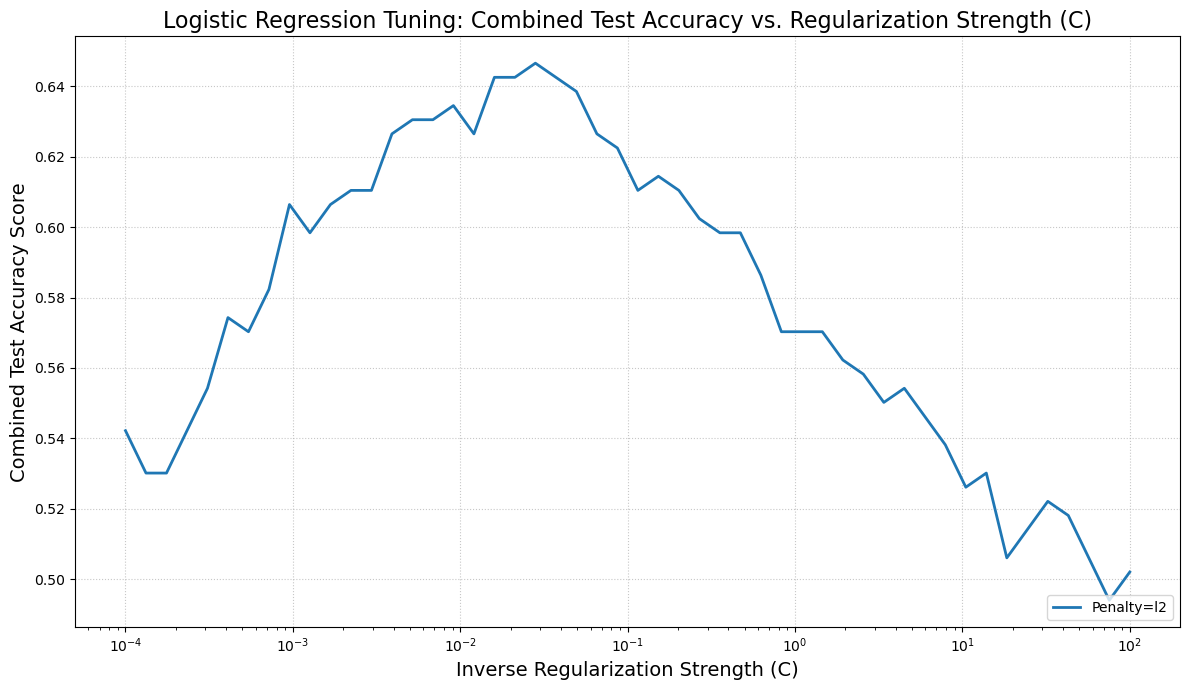

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- 1. Data Setup (Using your confirmed dimensions) ---
# The actual number of features based on your combined data shape
INPUT_SIZE = 2739 
NUM_TRAIN = 576
NUM_COMBINED = 249
NUM_CLASSES = 3

# NOTE: Using scaled data for better convergence
np.random.seed(42) # Ensure consistent random data
X_train = train_encoded.to_numpy() 
y_train = train_t
X_combined = combined_encoded.to_numpy()
y_combined = combined_t


# --- 2. Hyperparameter Grid and Metric Storage ---
# We will sweep over two common regularization penalties (replacing max_depth)
PENALTIES_TO_TEST = ['l2'] 
# We will sweep over C (Inverse of regularization strength) (replacing n_estimators)
# Log-spaced C values from 1e-4 (strong regularization) to 1e2 (weak regularization)
C_VALUES_TO_TEST = np.logspace(-4, 2, 50) 

# Nested dictionary to store all metrics: {penalty: {metric_name: [values]}}
# Note: I am using 'combined' as the key for the test set accuracy, matching the corrected RF code
all_metrics = {penalty: {'train': [], 'combined': []} for penalty in PENALTIES_TO_TEST}

print("Starting Logistic Regression Regularization Sweep...")

# --- 3. Nested Training Loops (Hyperparameter Sweep) ---
for penalty in PENALTIES_TO_TEST:
    
    # Skip L1 if the solver doesn't support it (e.g., 'lbfgs'). 'saga' supports L1 and L2.
    if penalty == 'l1':
        solver = 'saga'
    else:
        solver = 'lbfgs' # Efficient default for L2
    
    print(f"\n--- Testing Regularization Penalty={penalty}, Solver={solver} ---")
    
    # Iterate over C values (C is the inverse of regularization strength: smaller C -> stronger regularization)
    for c_val in C_VALUES_TO_TEST:
        
        # Initialize the model with the current penalty and C value
        model = LogisticRegression(
            penalty=penalty,
            C=c_val, # Pass the C parameter (inverse of regularization strength)
            solver=solver,
            max_iter=500, # Increased iterations for stability
            random_state=42, 
            n_jobs=-1
        )
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Calculate scores
        train_acc = model.score(X_train, y_train)
        combined_test_acc = model.score(X_combined, y_combined)
        
        # Store results
        all_metrics[penalty]['train'].append(train_acc)
        all_metrics[penalty]['combined'].append(combined_test_acc)
        
        if np.where(C_VALUES_TO_TEST == c_val)[0][0] % 10 == 0:
            print(f"  C={c_val:.4f} | Combined Test Acc: {combined_test_acc:.4f}")


# --- 4. Matplotlib Plotting ---

plt.figure(figsize=(12, 7))

# Plot the Combined Test Accuracy for each tested Penalty
for penalty, metrics in all_metrics.items():
    label_text = f'Penalty={penalty}'
    
    # Plot Combined Test Accuracy vs. C values
    plt.plot(C_VALUES_TO_TEST, metrics['combined'], label=label_text, linewidth=2)
    
    # Find the maximum combined test score for this penalty
    max_combined_acc = max(metrics['combined'])
    optimal_index = metrics['combined'].index(max_combined_acc)
    optimal_c = C_VALUES_TO_TEST[optimal_index]
    
    # Print the best result for reference
    print(f"\nBest result for Penalty={penalty}:")
    print(f"  Optimal C value: {optimal_c:.4f}, Max Combined Test Acc: {max_combined_acc:.4f}")

plt.xscale('log') # C is typically plotted on a log scale
plt.title('Logistic Regression Tuning: Combined Test Accuracy vs. Regularization Strength (C)', fontsize=16)
plt.xlabel('Inverse Regularization Strength (C)', fontsize=14)
plt.ylabel('Combined Test Accuracy Score', fontsize=14)
plt.legend(loc='lower right')
plt.grid(axis='both', linestyle='dotted', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- 1. Data Setup (Using your confirmed dimensions) ---
# The actual number of features based on your combined data shape
INPUT_SIZE = 2739 
NUM_TRAIN = 576
NUM_COMBINED = 249
NUM_CLASSES = 3

# NOTE: Using scaled data for better convergence
np.random.seed(42) # Ensure consistent random data
X_train = train_encoded.to_numpy() 
y_train = train_t
X_combined = combined_encoded.to_numpy()
y_combined = combined_t


# --- 2. Implement and Evaluate Unregularized Logistic Regression ---

print("Starting Unregularized Logistic Regression Training...")

# Set C to a very high value (e.g., 1e10) to effectively disable regularization.
# We must use a solver that supports L2 (like 'lbfgs') and a penalty (which L2 is by default)
model = LogisticRegression(
    penalty='l2', # L2 is required but C is so high it is negligible
    C=1e10, # Very large C value = practically no regularization
    solver='lbfgs', # Good, fast solver for L2
    max_iter=12,
    random_state=42, 
    n_jobs=-1
)

# Fit the model
model.fit(X_train, y_train)

# --- 3. Calculate and Report Scores ---

# Predict and score on training set
train_acc = model.score(X_train, y_train)

# Predict and score on combined test set
combined_test_acc = model.score(X_combined, y_combined)

print("\n--- Unregularized Logistic Regression Results ---")
print(f"Training Accuracy:      {train_acc:.4f}")
print(f"Combined Test Accuracy: {combined_test_acc:.4f}")

Starting Unregularized Logistic Regression Training...


/Users/puravgupta/miniforge3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 12 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=12).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Unregularized Logistic Regression Results ---
Training Accuracy:      0.7743
Combined Test Accuracy: 0.6064
